In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [5]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head(10)

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [23]:
cols = []
for c in customer_df.columns:
    cols.append(c.lower())
customer_df.columns = cols

In [24]:
customer_df.columns = customer_df.columns.str.lower()
customer_df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [19]:
customer_df['effective to date'] = pd.to_datetime(customer_df['effective to date'])
customer_df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [21]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.head(10)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042
6,5380.898636,55350,67,0,13,0,9,321.600000
7,7216.100311,0,101,0,68,0,4,363.029680
8,24127.504020,14072,71,13,3,0,2,511.200000
9,7388.178085,28812,93,17,7,0,8,425.527834


In [40]:
numerical_df.dtypes

customer lifetime value          float64
income                             int64
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
total claim amount               float64
dtype: object

In [45]:
continuous_df = numerical_df[['customer lifetime value','total claim amount']]
continuous_df

,customer lifetime value,total claim amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879
...,...,...
9129,23405.987980,198.234764
9130,3096.511217,379.200000
9131,8163.890428,790.784983
9132,7524.442436,691.200000


In [48]:
discrete_df = numerical_df.drop(['customer lifetime value','total claim amount'],axis=1)
discrete_df

,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1
...,...,...,...,...,...,...
9129,71941,73,18,89,0,2
9130,21604,79,14,28,0,1
9131,0,85,9,37,3,2
9132,21941,96,34,3,0,3


In [26]:
numerical_df.isnull().sum()/len(numerical_df)

customer lifetime value          0.0
income                           0.0
monthly premium auto             0.0
months since last claim          0.0
months since policy inception    0.0
number of open complaints        0.0
number of policies               0.0
total claim amount               0.0
dtype: float64

In [27]:
numerical_df['income'].value_counts(dropna=False)

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [29]:
numerical_df.shape

(9134, 8)

In [38]:
numerical_df.isna().any()

customer lifetime value          False
income                           False
monthly premium auto             False
months since last claim          False
months since policy inception    False
number of open complaints        False
number of policies               False
total claim amount               False
dtype: bool

<Axes: >

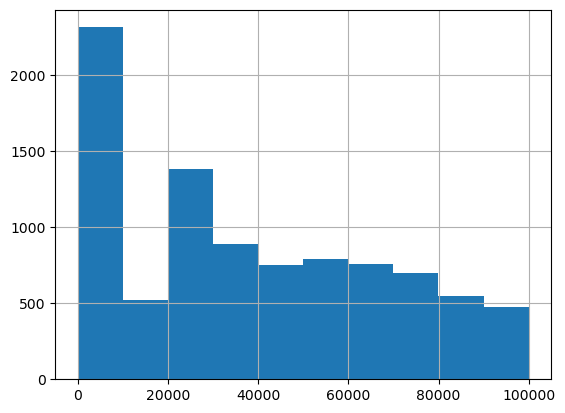

In [30]:
numerical_df['income'].hist()

In [54]:
numerical_corr = numerical_df.corr()
numerical_corr

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total claim amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


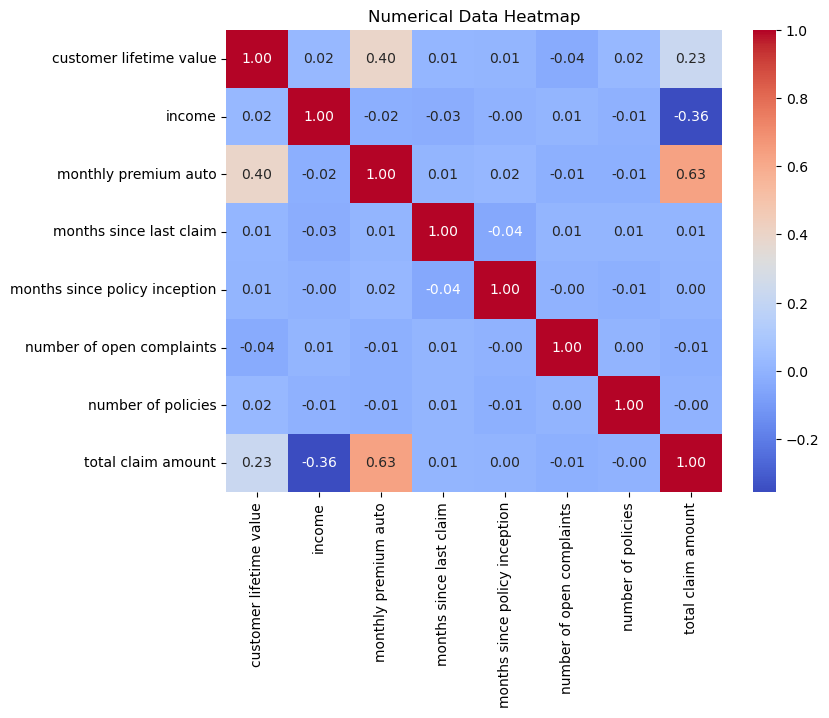

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Numerical Data Heatmap")
plt.show()
#Heatmap shows a pretty strong correlation between the monthy premium amount and the total claim amount.
#This follows the logic that the higher a premium one pays, the better coverage they would expect to have if ever involved in an incident where a claim is filed.

In [65]:
continuous_corr = continuous_df.corr()
continuous_corr

,customer lifetime value,total claim amount
customer lifetime value,1.0,-1.0
total claim amount,-1.0,1.0


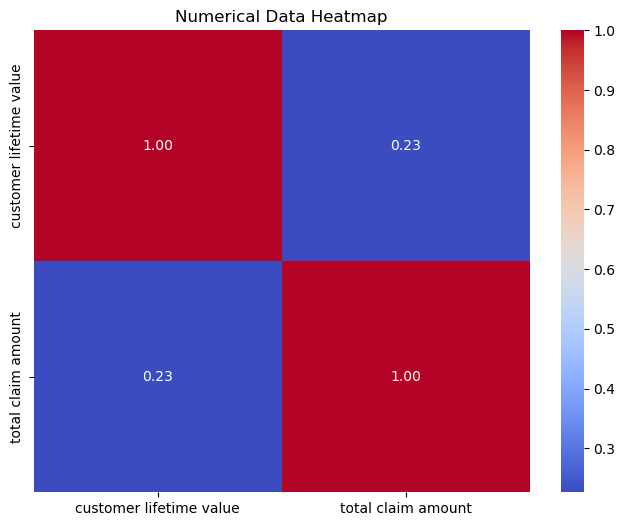

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(continuous_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Numerical Data Heatmap")
plt.show()

In [52]:
discrete_corr = discrete_df.corr()
discrete_corr

,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
income,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly premium auto,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months since last claim,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months since policy inception,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number of open complaints,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number of policies,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


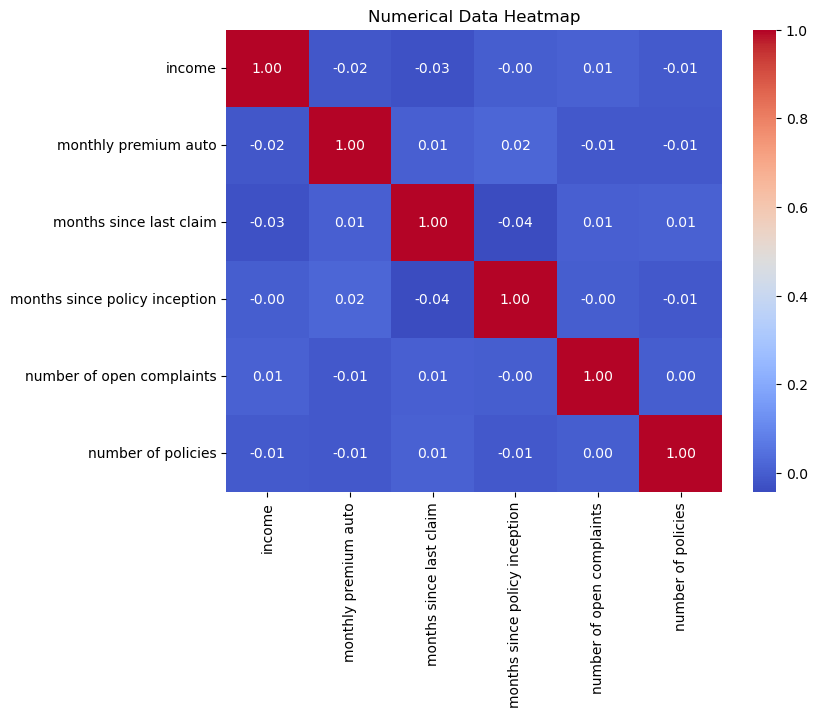

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(discrete_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Numerical Data Heatmap")
plt.show()

In [80]:
sns.boxplot(x='monthly premium auto',y='total claim amount',continuous_df=continuous_df)
plt.show()
#Not sure why this is happening...

ValueError: Could not interpret input 'monthly premium auto'

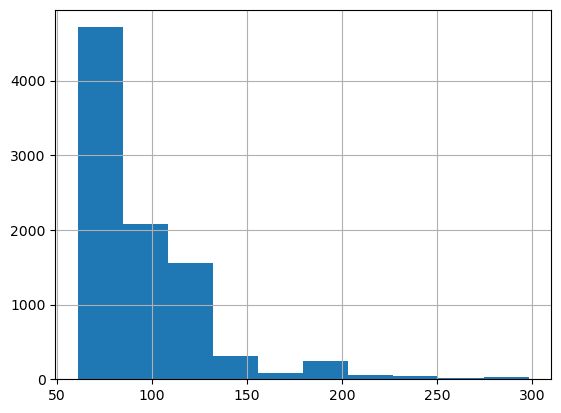

In [60]:
numerical_df['monthly premium auto'].hist(bins=10)
plt.show()

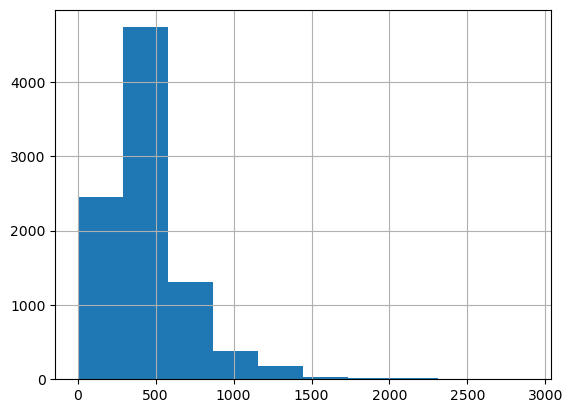

In [61]:
numerical_df['total claim amount'].hist(bins=10)
plt.show()

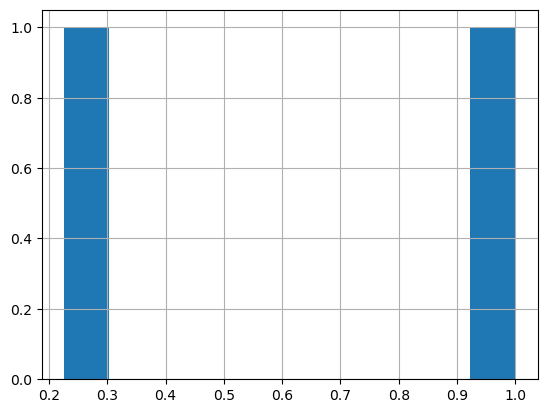

In [68]:
continuous_df['customer lifetime value'].hist(bins=10)
plt.show()

# sns.boxplot(y=data['TIMELAG'])
# plt.show()

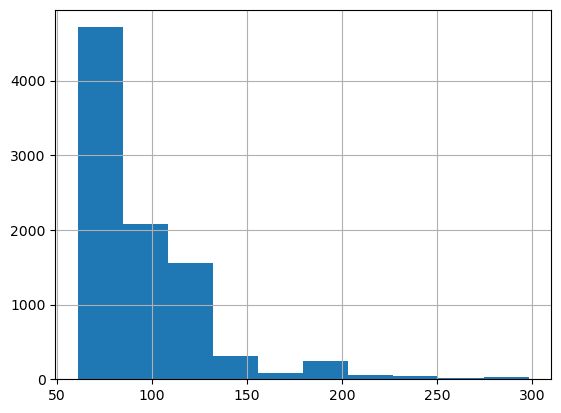

In [69]:
discrete_df['monthly premium auto'].hist(bins=10)
plt.show()

In [87]:
numerical_df.to_csv('numerical_df.csv', index=False)